# import dataset

dataset berupa data sinyal ekg yang terdiri dari subyek normal dan upnormal

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("./EKG.csv",header=None)
names = ['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11','t12','t13','t14','t15','t16','t17','t18','t19','t20','t21','t22','t23','t24','t25','t26','t27','t28','t29','t30','t31','t32','t33','t34','t35','t36','t37','t38','t39','t40','t41','t42','t43','t44','t45','t46','t47','t48','t49','t50','t51','t52','t53','t54','t55','t56','t57','t58','t59','t60','t61','t62','t63','t64','t65','t66','t67','t68','t69','t70','t71','t72','t73','t74','t75','t76','t77','t78','t79','t80','t81','t82','t83','t84','t85','t86','t87','t88','t89','t90','t91','t92','t93','t94','t95','t96','t97','t98','t99','t100','t101','t102','t103','t104','t105','t106','t107','t108','t109','t110','t111','t112','t113','t114','t115','t116','t117','t118','t119','t120','t121','t122','t123','t124','t125','t126','t127','t128','t129','t130','t131','t132','t133','t134','t135','t136','t137','t138','t139','t140','t141','t142','t143','t144','t145','t146','t147','t148','t149','t150','t151','t152','t153','t154','t155','t156','t157','t158','t159','t160','t161','t162','t163','t164','t165','t166','t167','t168','t169','t170','t171','t172','t173','t174','t175','t176','t177','t178','t179','t180','t181','t182','t183','t184','t185','t186','t187'
, 'class']
df.columns = names
print(df.head(2))
print(df.info())
print(df.describe())

      t1     t2     t3     t4     t5     t6      t7      t8      t9     t10  \
0  0.978  0.926  0.681  0.245  0.154  0.191  0.1520  0.0858  0.0588  0.0490   
1  0.960  0.863  0.462  0.197  0.094  0.125  0.0997  0.0883  0.0741  0.0826   

   ...  t179  t180  t181  t182  t183  t184  t185  t186  t187   class  
0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  normal  
1  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  normal  

[2 rows x 188 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, t1 to class
dtypes: float64(187), object(1)
memory usage: 125.6+ MB
None
                 t1            t2            t3            t4            t5  \
count  87554.000000  87554.000000  87554.000000  87554.000000  87554.000000   
mean       0.890360      0.758161      0.423971      0.219103      0.201127   
std        0.240908      0.221812      0.227306      0.206879      0.177057   
min        0.000000      0.000000     

In [3]:
df.isnull().sum()

t1       0
t2       0
t3       0
t4       0
t5       0
        ..
t184     0
t185     0
t186     0
t187     0
class    0
Length: 188, dtype: int64

In [4]:
def label_encode(df):
    df_labelled = df.copy()
    # Dictionary to input the different numbers for different classes
    label_encode = {"class": {"normal":0, "supraventricular ectopic":1, "ventricular ectopic":2, "fusion":3, "unknown":4}}

    # Use .replace to change the different classes into numbers
    df_labelled.replace(label_encode,inplace=True)
    return df_labelled

In [5]:
x_values = df[['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11','t12','t13','t14','t15','t16','t17','t18','t19','t20','t21','t22','t23','t24','t25','t26','t27','t28','t29','t30','t31','t32','t33','t34','t35','t36','t37','t38','t39','t40','t41','t42','t43','t44','t45','t46','t47','t48','t49','t50','t51','t52','t53','t54','t55','t56','t57','t58','t59','t60','t61','t62','t63','t64','t65','t66','t67','t68','t69','t70','t71','t72','t73','t74','t75','t76','t77','t78','t79','t80','t81','t82','t83','t84','t85','t86','t87','t88','t89','t90','t91','t92','t93','t94','t95','t96','t97','t98','t99','t100','t101','t102','t103','t104','t105','t106','t107','t108','t109','t110','t111','t112','t113','t114','t115','t116','t117','t118','t119','t120','t121','t122','t123','t124','t125','t126','t127','t128','t129','t130','t131','t132','t133','t134','t135','t136','t137','t138','t139','t140','t141','t142','t143','t144','t145','t146','t147','t148','t149','t150','t151','t152','t153','t154','t155','t156','t157','t158','t159','t160','t161','t162','t163','t164','t165','t166','t167','t168','t169','t170','t171','t172','t173','t174','t175','t176','t177','t178','t179','t180','t181','t182','t183','t184','t185','t186','t187'
]]
y_values = df['class']

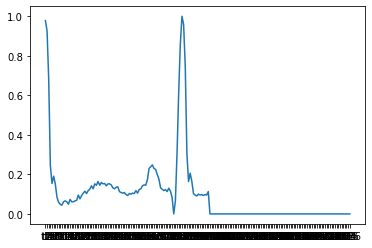

In [7]:
import ecg_plot
import matplotlib.pyplot as plt

plt.plot(df.iloc[0,:186]) #normal

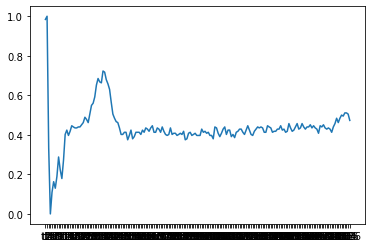

In [8]:
plt.plot(df.iloc[72472,:186]) #supraventricular ectopic

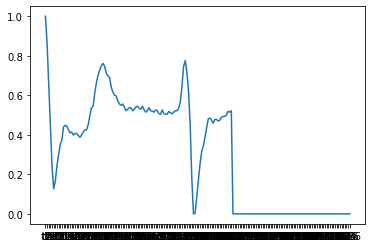

In [9]:
plt.plot(df.iloc[74695,:186]) #ventricular ectopic

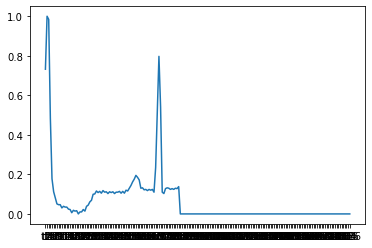

In [87]:
plt.plot(df.iloc[80483,:186]) #fusion

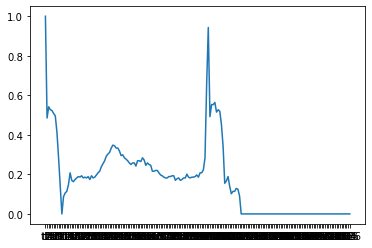

In [88]:
plt.plot(df.iloc[81124,:186]) #unknown

# Train and test

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_values,y_values,test_size=0.3,random_state=10)
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [7]:
#Train a K-Nearest Neighbours algorithm with the dataset.

KNN = KNeighborsClassifier(n_neighbors=6) 
KNN = KNN.fit(x_train_scale,y_train)


In [8]:
y_predict = KNN.predict(x_test_scale)

# Conv materix

In [9]:
from sklearn.metrics import confusion_matrix  
matrix = (confusion_matrix(y_test, y_predict))  
print(matrix)

[[  131    41     0     0    15]
 [   17 21639    38     7    87]
 [    0   223   426     0     7]
 [    0    81     0  1800    11]
 [   18   228    11    11  1476]]


# Akurasi

In [10]:
akurasi = ((matrix[0,0]+matrix[1,1]+matrix[2,2]+matrix[3,3]+matrix[4,4])/(matrix[0,0]+matrix[0,1]+matrix[0,2]+matrix[0,3]+matrix[0,4]+matrix[1,0]+matrix[1,1]+matrix[1,2]+matrix[1,3]+matrix[1,4]+matrix[2,0]+matrix[2,1]+matrix[2,2]+matrix[2,3]+matrix[2,4]+matrix[3,0]+matrix[3,1]+matrix[3,2]+matrix[3,3]+matrix[3,4]+matrix[4,0]+matrix[4,1]+matrix[4,2]+matrix[4,3]+matrix[4,4])*100)
print(akurasi)

96.97338866258043


# Predict

In [24]:
normalpredict = pd.read_csv("./predict normal.csv")

KNN = KNeighborsClassifier()

# Extract out the x values and y values. x will be sepal_length and y will be classes
x = df[['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11','t12','t13','t14','t15','t16','t17','t18','t19','t20','t21','t22','t23','t24','t25','t26','t27','t28','t29','t30','t31','t32','t33','t34','t35','t36','t37','t38','t39','t40','t41','t42','t43','t44','t45','t46','t47','t48','t49','t50','t51','t52','t53','t54','t55','t56','t57','t58','t59','t60','t61','t62','t63','t64','t65','t66','t67','t68','t69','t70','t71','t72','t73','t74','t75','t76','t77','t78','t79','t80','t81','t82','t83','t84','t85','t86','t87','t88','t89','t90','t91','t92','t93','t94','t95','t96','t97','t98','t99','t100','t101','t102','t103','t104','t105','t106','t107','t108','t109','t110','t111','t112','t113','t114','t115','t116','t117','t118','t119','t120','t121','t122','t123','t124','t125','t126','t127','t128','t129','t130','t131','t132','t133','t134','t135','t136','t137','t138','t139','t140','t141','t142','t143','t144','t145','t146','t147','t148','t149','t150','t151','t152','t153','t154','t155','t156','t157','t158','t159','t160','t161','t162','t163','t164','t165','t166','t167','t168','t169','t170','t171','t172','t173','t174','t175','t176','t177','t178','t179','t180','t181','t182','t183','t184','t185','t186','t187'
]]
y = df['class']

# Train KNN using the x and y values. This is done through the .fit method.
knn = KNN.fit(x,y)

# Let us use the trained KNN to predict the type of flower if its sepal length = 5 and sepal_width = 3 We can use the .predict method to do so.
test = normalpredict
predictEKG = KNN.predict(test)

print(predictEKG)

['normal']


In [25]:
SEpredict = pd.read_csv("./predict supraventricular ectopic.csv")

KNN = KNeighborsClassifier()

# Extract out the x values and y values. x will be sepal_length and y will be classes
x = df[['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11','t12','t13','t14','t15','t16','t17','t18','t19','t20','t21','t22','t23','t24','t25','t26','t27','t28','t29','t30','t31','t32','t33','t34','t35','t36','t37','t38','t39','t40','t41','t42','t43','t44','t45','t46','t47','t48','t49','t50','t51','t52','t53','t54','t55','t56','t57','t58','t59','t60','t61','t62','t63','t64','t65','t66','t67','t68','t69','t70','t71','t72','t73','t74','t75','t76','t77','t78','t79','t80','t81','t82','t83','t84','t85','t86','t87','t88','t89','t90','t91','t92','t93','t94','t95','t96','t97','t98','t99','t100','t101','t102','t103','t104','t105','t106','t107','t108','t109','t110','t111','t112','t113','t114','t115','t116','t117','t118','t119','t120','t121','t122','t123','t124','t125','t126','t127','t128','t129','t130','t131','t132','t133','t134','t135','t136','t137','t138','t139','t140','t141','t142','t143','t144','t145','t146','t147','t148','t149','t150','t151','t152','t153','t154','t155','t156','t157','t158','t159','t160','t161','t162','t163','t164','t165','t166','t167','t168','t169','t170','t171','t172','t173','t174','t175','t176','t177','t178','t179','t180','t181','t182','t183','t184','t185','t186','t187'
]]
y = df['class']

# Train KNN using the x and y values. This is done through the .fit method.
knn = KNN.fit(x,y)

# Let us use the trained KNN to predict the type of flower if its sepal length = 5 and sepal_width = 3 We can use the .predict method to do so.
test = SEpredict
predictEKG = KNN.predict(test)

print(predictEKG)

['supraventicular ectopic']


In [27]:
VEpredict = pd.read_csv("./predict ventricular ectopic.csv")

KNN = KNeighborsClassifier()

# Extract out the x values and y values. x will be sepal_length and y will be classes
x = df[['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11','t12','t13','t14','t15','t16','t17','t18','t19','t20','t21','t22','t23','t24','t25','t26','t27','t28','t29','t30','t31','t32','t33','t34','t35','t36','t37','t38','t39','t40','t41','t42','t43','t44','t45','t46','t47','t48','t49','t50','t51','t52','t53','t54','t55','t56','t57','t58','t59','t60','t61','t62','t63','t64','t65','t66','t67','t68','t69','t70','t71','t72','t73','t74','t75','t76','t77','t78','t79','t80','t81','t82','t83','t84','t85','t86','t87','t88','t89','t90','t91','t92','t93','t94','t95','t96','t97','t98','t99','t100','t101','t102','t103','t104','t105','t106','t107','t108','t109','t110','t111','t112','t113','t114','t115','t116','t117','t118','t119','t120','t121','t122','t123','t124','t125','t126','t127','t128','t129','t130','t131','t132','t133','t134','t135','t136','t137','t138','t139','t140','t141','t142','t143','t144','t145','t146','t147','t148','t149','t150','t151','t152','t153','t154','t155','t156','t157','t158','t159','t160','t161','t162','t163','t164','t165','t166','t167','t168','t169','t170','t171','t172','t173','t174','t175','t176','t177','t178','t179','t180','t181','t182','t183','t184','t185','t186','t187'
]]
y = df['class']

# Train KNN using the x and y values. This is done through the .fit method.
knn = KNN.fit(x,y)

# Let us use the trained KNN to predict the type of flower if its sepal length = 5 and sepal_width = 3 We can use the .predict method to do so.
test = VEpredict
predictEKG = KNN.predict(test)

print(predictEKG)

['fusion']


In [83]:
fusionpredict = pd.read_csv("./predict fusion.csv")

KNN = KNeighborsClassifier()

# Extract out the x values and y values. x will be sepal_length and y will be classes
x = df[['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11','t12','t13','t14','t15','t16','t17','t18','t19','t20','t21','t22','t23','t24','t25','t26','t27','t28','t29','t30','t31','t32','t33','t34','t35','t36','t37','t38','t39','t40','t41','t42','t43','t44','t45','t46','t47','t48','t49','t50','t51','t52','t53','t54','t55','t56','t57','t58','t59','t60','t61','t62','t63','t64','t65','t66','t67','t68','t69','t70','t71','t72','t73','t74','t75','t76','t77','t78','t79','t80','t81','t82','t83','t84','t85','t86','t87','t88','t89','t90','t91','t92','t93','t94','t95','t96','t97','t98','t99','t100','t101','t102','t103','t104','t105','t106','t107','t108','t109','t110','t111','t112','t113','t114','t115','t116','t117','t118','t119','t120','t121','t122','t123','t124','t125','t126','t127','t128','t129','t130','t131','t132','t133','t134','t135','t136','t137','t138','t139','t140','t141','t142','t143','t144','t145','t146','t147','t148','t149','t150','t151','t152','t153','t154','t155','t156','t157','t158','t159','t160','t161','t162','t163','t164','t165','t166','t167','t168','t169','t170','t171','t172','t173','t174','t175','t176','t177','t178','t179','t180','t181','t182','t183','t184','t185','t186','t187'
]]
y = df['class']

# Train KNN using the x and y values. This is done through the .fit method.
knn = KNN.fit(x,y)

# Let us use the trained KNN to predict the type of flower if its sepal length = 5 and sepal_width = 3 We can use the .predict method to do so.
test = fusionpredict
predictEKG = KNN.predict(test)

print(predictEKG)

['fusion']


# Decision tree

In [87]:
from sklearn import tree

dt = tree.DecisionTreeClassifier(max_depth = 16, min_samples_split = 6)
dt.fit(x_train_scale,y_train)

DecisionTreeClassifier(max_depth=16, min_samples_split=6)

In [88]:
y_predict = dt.predict(x_test_scale)

In [89]:
matrix2 = (confusion_matrix(y_test, y_predict))  
print(matrix2)

[[   97    72     0     0    18]
 [   17 21535    60    44   132]
 [    1   264   376     5    10]
 [    1   133     9  1730    19]
 [   19   264    13    22  1426]]


In [90]:
akurasi = ((matrix2[0,0]+matrix2[1,1]+matrix2[2,2]+matrix2[3,3]+matrix2[4,4])/(matrix2[0,0]+matrix2[0,1]+matrix2[0,2]+matrix2[0,3]+matrix2[0,4]+matrix2[1,0]+matrix2[1,1]+matrix2[1,2]+matrix2[1,3]+matrix2[1,4]+matrix2[2,0]+matrix2[2,1]+matrix2[2,2]+matrix2[2,3]+matrix2[2,4]+matrix2[3,0]+matrix2[3,1]+matrix2[3,2]+matrix2[3,3]+matrix2[3,4]+matrix2[4,0]+matrix2[4,1]+matrix2[4,2]+matrix2[4,3]+matrix2[4,4])*100)
print(akurasi)

95.80081471047322


# predict

In [92]:
normalpredict = pd.read_csv("./predict normal.csv")

KNN = KNeighborsClassifier()

# Extract out the x values and y values. x will be sepal_length and y will be classes
x = df[['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11','t12','t13','t14','t15','t16','t17','t18','t19','t20','t21','t22','t23','t24','t25','t26','t27','t28','t29','t30','t31','t32','t33','t34','t35','t36','t37','t38','t39','t40','t41','t42','t43','t44','t45','t46','t47','t48','t49','t50','t51','t52','t53','t54','t55','t56','t57','t58','t59','t60','t61','t62','t63','t64','t65','t66','t67','t68','t69','t70','t71','t72','t73','t74','t75','t76','t77','t78','t79','t80','t81','t82','t83','t84','t85','t86','t87','t88','t89','t90','t91','t92','t93','t94','t95','t96','t97','t98','t99','t100','t101','t102','t103','t104','t105','t106','t107','t108','t109','t110','t111','t112','t113','t114','t115','t116','t117','t118','t119','t120','t121','t122','t123','t124','t125','t126','t127','t128','t129','t130','t131','t132','t133','t134','t135','t136','t137','t138','t139','t140','t141','t142','t143','t144','t145','t146','t147','t148','t149','t150','t151','t152','t153','t154','t155','t156','t157','t158','t159','t160','t161','t162','t163','t164','t165','t166','t167','t168','t169','t170','t171','t172','t173','t174','t175','t176','t177','t178','t179','t180','t181','t182','t183','t184','t185','t186','t187'
]]
y = df['class']

# Train KNN using the x and y values. This is done through the .fit method.
DT = dt.fit(x,y)

# Let us use the trained KNN to predict the type of flower if its sepal length = 5 and sepal_width = 3 We can use the .predict method to do so.
normaltest = normalpredict
predictEKG = DT.predict(normaltest)

print(predictEKG)

['normal']


In [93]:
SEpredict = pd.read_csv("./predict supraventricular ectopic.csv")

KNN = KNeighborsClassifier()

# Extract out the x values and y values. x will be sepal_length and y will be classes
x = df[['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11','t12','t13','t14','t15','t16','t17','t18','t19','t20','t21','t22','t23','t24','t25','t26','t27','t28','t29','t30','t31','t32','t33','t34','t35','t36','t37','t38','t39','t40','t41','t42','t43','t44','t45','t46','t47','t48','t49','t50','t51','t52','t53','t54','t55','t56','t57','t58','t59','t60','t61','t62','t63','t64','t65','t66','t67','t68','t69','t70','t71','t72','t73','t74','t75','t76','t77','t78','t79','t80','t81','t82','t83','t84','t85','t86','t87','t88','t89','t90','t91','t92','t93','t94','t95','t96','t97','t98','t99','t100','t101','t102','t103','t104','t105','t106','t107','t108','t109','t110','t111','t112','t113','t114','t115','t116','t117','t118','t119','t120','t121','t122','t123','t124','t125','t126','t127','t128','t129','t130','t131','t132','t133','t134','t135','t136','t137','t138','t139','t140','t141','t142','t143','t144','t145','t146','t147','t148','t149','t150','t151','t152','t153','t154','t155','t156','t157','t158','t159','t160','t161','t162','t163','t164','t165','t166','t167','t168','t169','t170','t171','t172','t173','t174','t175','t176','t177','t178','t179','t180','t181','t182','t183','t184','t185','t186','t187'
]]
y = df['class']

# Train KNN using the x and y values. This is done through the .fit method.
DT = dt.fit(x,y)

# Let us use the trained KNN to predict the type of flower if its sepal length = 5 and sepal_width = 3 We can use the .predict method to do so.
SEtest = SEpredict
predictEKG = DT.predict(SEtest)

print(predictEKG)

['supraventicular ectopic']


In [94]:
VEpredict = pd.read_csv("./predict ventricular ectopic.csv")

KNN = KNeighborsClassifier()

# Extract out the x values and y values. x will be sepal_length and y will be classes
x = df[['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11','t12','t13','t14','t15','t16','t17','t18','t19','t20','t21','t22','t23','t24','t25','t26','t27','t28','t29','t30','t31','t32','t33','t34','t35','t36','t37','t38','t39','t40','t41','t42','t43','t44','t45','t46','t47','t48','t49','t50','t51','t52','t53','t54','t55','t56','t57','t58','t59','t60','t61','t62','t63','t64','t65','t66','t67','t68','t69','t70','t71','t72','t73','t74','t75','t76','t77','t78','t79','t80','t81','t82','t83','t84','t85','t86','t87','t88','t89','t90','t91','t92','t93','t94','t95','t96','t97','t98','t99','t100','t101','t102','t103','t104','t105','t106','t107','t108','t109','t110','t111','t112','t113','t114','t115','t116','t117','t118','t119','t120','t121','t122','t123','t124','t125','t126','t127','t128','t129','t130','t131','t132','t133','t134','t135','t136','t137','t138','t139','t140','t141','t142','t143','t144','t145','t146','t147','t148','t149','t150','t151','t152','t153','t154','t155','t156','t157','t158','t159','t160','t161','t162','t163','t164','t165','t166','t167','t168','t169','t170','t171','t172','t173','t174','t175','t176','t177','t178','t179','t180','t181','t182','t183','t184','t185','t186','t187'
]]
y = df['class']

# Train KNN using the x and y values. This is done through the .fit method.
DT = dt.fit(x,y)

# Let us use the trained KNN to predict the type of flower if its sepal length = 5 and sepal_width = 3 We can use the .predict method to do so.
VEtest = VEpredict
predictEKG = DT.predict(VEtest)

print(predictEKG)

['normal']


In [97]:
fusionpredict = pd.read_csv("./predict fusion.csv")

KNN = KNeighborsClassifier()

# Extract out the x values and y values. x will be sepal_length and y will be classes
x = df[['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11','t12','t13','t14','t15','t16','t17','t18','t19','t20','t21','t22','t23','t24','t25','t26','t27','t28','t29','t30','t31','t32','t33','t34','t35','t36','t37','t38','t39','t40','t41','t42','t43','t44','t45','t46','t47','t48','t49','t50','t51','t52','t53','t54','t55','t56','t57','t58','t59','t60','t61','t62','t63','t64','t65','t66','t67','t68','t69','t70','t71','t72','t73','t74','t75','t76','t77','t78','t79','t80','t81','t82','t83','t84','t85','t86','t87','t88','t89','t90','t91','t92','t93','t94','t95','t96','t97','t98','t99','t100','t101','t102','t103','t104','t105','t106','t107','t108','t109','t110','t111','t112','t113','t114','t115','t116','t117','t118','t119','t120','t121','t122','t123','t124','t125','t126','t127','t128','t129','t130','t131','t132','t133','t134','t135','t136','t137','t138','t139','t140','t141','t142','t143','t144','t145','t146','t147','t148','t149','t150','t151','t152','t153','t154','t155','t156','t157','t158','t159','t160','t161','t162','t163','t164','t165','t166','t167','t168','t169','t170','t171','t172','t173','t174','t175','t176','t177','t178','t179','t180','t181','t182','t183','t184','t185','t186','t187'
]]
y = df['class']

# Train KNN using the x and y values. This is done through the .fit method.
DT = dt.fit(x,y)

# Let us use the trained KNN to predict the type of flower if its sepal length = 5 and sepal_width = 3 We can use the .predict method to do so.
fusiontest = fusionpredict
predictEKG = DT.predict(fusiontest)

print(predictEKG)

['normal']
